# Multiple Linear Regression with Sacramento Real Estate Data

In [10]:
# Data Mining
import pandas as pd

# Model Building 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('./Sacramentorealestatetransactions (1).csv')
df.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


# Exploratory Data Analysis

In [3]:
df.describe()
# Notice that there is negative price (remove)
# Notice that there is negative square footage 
# Notice that there is bedrooms and bathooms = 0 
# Because of floor plans (lofts, half baths, etc) bedrooms and bathrooms not best data to remove
# Remove square footage = 0 instead

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


### _Notable Findings_
- Notice that there are bedrooms/bathrroms listed as 0. Because of floor plans (lofts, half baths, etc) these observations are not the best data to remove.
- However, there are some observations with square footage = 0. Remove these observations instead.

In [4]:
# Removing square footage = 0 via indexing 
df = df[df.sq__ft != 0]

# Checking progress
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,85.3440,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674705,-121.325844
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


### _Engineered Features - Dummy Variables_
- A Dummy Variable is an artificial variable created to represent an attribute with two or more distinct categories/levels. 
- In order to make the following features usable in model building they will be converted to such, encoded as a binary columnn in the dataframe.Pandas has a handy .get_dummies( ) method that will assist in doing so.

In [5]:
# Creating Dummy Variables 
df1 = pd.get_dummies(df["beds"], prefix = "BDR") 
df2 = pd.get_dummies(df["baths"], prefix = "BTHRM")
df3 = pd.get_dummies(df["type"])
dummies = pd.concat([df1, df2, df3], axis=1)

# Inspecting
dummies.head(10)

,BDR_1,BDR_2,BDR_3,BDR_4,BDR_5,BDR_6,BDR_8,BTHRM_1,BTHRM_2,BTHRM_3,BTHRM_4,BTHRM_5,Condo,Multi-Family,Residential
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
7,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [7]:
# Adding Dummy Variables DataFrame to original DataFrame
df = pd.concat([df,dummies], axis=1)

# Model Building 
- Two different libraries will be leveraged to build MLR models predicting price, each including at least three variables with the inclusionn of a dummy-coded variable in one. 

### _MLR using Stats Models_

In [8]:
# Definin X and y variables 
X = df[['sq__ft', 'beds', 'baths']]
y = df['price']

# Fitting MLR model 
    # Note StateModels formula is in reverse (y,X)
model = sm.OLS(y,X).fit()

# Making predictions 
y_pred = model.predict(X)

# Generate table showing summary stats including :
    # r2
    # model coefficients
# Stats models has a summary function that easily does so (scikit-learn does not)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     2133.
Date:                Wed, 01 Aug 2018   Prob (F-statistic):               0.00
Time:                        18:14:52   Log-Likelihood:                -10411.
No. Observations:                 814   AIC:                         2.083e+04
Df Residuals:                     811   BIC:                         2.084e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft       127.4455      7.242     17.597      0.000     113.229     141.662
beds        1019.7898   4033.037      0.253      0.800   -6896.632    8936.212
baths        1.04e+04   6776.795      1.534      0.125   -2905.753    2.37e+04
==============================================================================
Omnibus:                      197.879   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5231.060
Skew:                           0.444   Prob(JB):                         0.00
Kurtosis:                      15.387   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### _Evaluating MLR Visually_

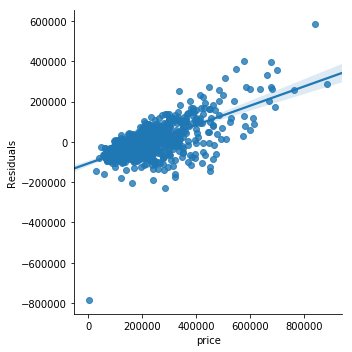

In [9]:
# Plotting residuals 

df['y_pred'] = y_pred
df['Residuals'] = df['price'] - df['y_pred']
 

sns.lmplot(x ='price', y = 'Residuals', data=df)

### _MLR using Scikit-Learn_

In [27]:
# Defining X and y variables
X = df[['Condo','Residential','sq__ft']]
y = df['price']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)

# Fitting linear regression model on training data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on testing data 
y_pred = linreg.predict(X_test)

# Again, Sci-kit learn does not have the .summary( ) method like stats models 
    # The summary stats can be manually dervied 
coefficients = linreg.coef_
intercept = linreg.intercept_
r2 = metrics.r2_score(y_test,y_pred)


print('Coefficient:', coefficients)
print('         r2:', r2)

Coefficient: [46062.32092184 64712.42879579   124.00725102]
         r2: 0.6138515688223802


### _Evaluating MLR Visually_

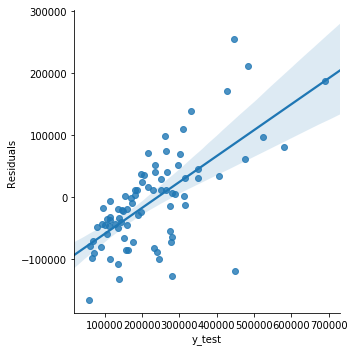

In [59]:
# Creating dataframe out of actual vs predicted values 
df = pd.DataFrame({'y_pred':y_pred,'y_test':y_test})

# Calculating Residuals
df['Residuals'] = df['y_test'] - df['y_pred']

# Plotting
sns.lmplot(x ='y_test', y = 'Residuals', data=df)